# Проект: Як формуються ціни на житло на Airbnb


### 1. Мета, завдання дослідження та вибір алгоритму машинного навчання

- Мета дослідження:

Метою цього дослідження є краще розуміння факторів, які впливають на ціни оренди Airbnb в Афінах та надання власникам помешкань інформації про те, як можна покращити характеристики житла та встановити оптимальну ціну для збільшення його популярності серед клієнтів Airbnb.

- Завдання дослідження:

1. Аналізувати набір даних про оренду помешкань на Airbnb в Афінах.
2. Виявити фактори, які впливають на формування цін на оренду помешкань та їх вагомість.
3. Надати власникам помешкань на Airbnb рекомендації щодо покращення характеристик житла з метою збільшення його популярності серед клієнтів.
4. Застосувати алгоритм машинного навчання (лінійна регресія) для прогнозування цін оренди помешкань на Airbnb в Афінах та надати новим власникам житла рекомендації щодо встановлення оптимальної ціни оренди їх помешкань.

- Обґрунтування вибору алгоритму машинного навчання (лінійна регресія):

Лінійна регресія є ефективним інструментом для визначення лінійних залежностей між вхідними ознаками та цільовою змінною. У нашому випадку, ми можемо використовувати лінійну регресію для побудови моделі, яка враховуватиме різні фактори, що впливають на ціни оренди.
Загалом, лінійна регресія є розумним вибором алгоритму машинного навчання для вирішення поставленого завдання, оскільки вона дозволяє нам побудувати просту та ефективну модель для прогнозування цін на оренду помешкань на Airbnb в Афінах.

In [1]:
#імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# графіки вбудовуються в блокнот 
%matplotlib inline

# відключити попередження Anaconda
import warnings
warnings.simplefilter('ignore')

### 2. Детальний аналіз датасету.

In [2]:
# Зчитуємо в датафрейм df файл з початковими даними
airbnb = pd.read_csv('airbnb_europe.csv')
airbnb.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
0,0,138.963748,Entire home/apt,False,False,4,True,1,0,76.084456,90.122232,1,0.407278,0.304570,9.054205,6.080622,23.73168,37.97776
1,1,91.627024,Entire home/apt,False,False,4,True,1,0,75.374405,88.103504,1,4.367463,0.297474,1.499687,0.876720,23.72712,38.01435
2,2,76.629250,Private room,False,True,2,False,0,0,75.149439,88.508535,1,2.194174,0.385247,2.966519,1.692414,23.73391,37.99529
3,3,151.852459,Entire home/apt,False,False,4,True,0,1,76.277787,89.106814,2,2.508982,0.563473,2.591282,1.510748,23.73200,37.99800
4,4,98.657231,Entire home/apt,False,False,2,True,1,0,76.479858,88.457946,1,2.740581,0.725045,2.370037,1.383049,23.73100,38.00000


In [3]:
# Використаємо .info ()
airbnb.info ()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2627 entries, 0 to 2626

Data columns (total 18 columns):

 #   Column                      Non-Null Count  Dtype  

---  ------                      --------------  -----  

 0   Unnamed: 0                  2627 non-null   int64  

 1   realSum                     2627 non-null   float64

 2   room_type                   2627 non-null   object 

 3   room_shared                 2627 non-null   bool   

 4   room_private                2627 non-null   bool   

 5   person_capacity             2627 non-null   int64  

 6   host_is_superhost           2627 non-null   bool   

 7   multi                       2627 non-null   int64  

 8   biz                         2627 non-null   int64  

 9   cleanliness_rating          2627 non-null   float64

 10  guest_satisfaction_overall  2627 non-null   float64

 11  bedrooms                    2627 non-null   int64  

 12  dist                        2627 non-null   float64

 13  metro_dist     

Цей набір даних містить інформацію щодо оренди помешкань на сайті Airbnb в Афінах, включаючи ціну, тип кімнати, статус господаря, зручності та інформацію про місцезнаходження: 

- Unnamed: 0 - індекс рядків (тип int64)
- realSum - повна вартість проживання двох осіб протягом двох ночей в євро.(тип float64)
- room_type тип орендованого приміщення.(тип object)
- room_shared  - чи ділите кімнату з іншими (господар або гості).(тип bool) 
- room_private - чи є кімната повністю у вашому розпорядженні на час оренди. (тип bool) 
- person_capacity - максимальна кількість людей, яку можна розмістити. (тип int64)
- host_is_superhost - чи визначено орендодавця як супергосподаря на Airbnb.  (тип bool)
- multi - чи пропонує господар кілька кімнат для оренди в одному приміщенні.  (тип int64)
- biz - чи може бути орендовано приміщення для бізнес-зустрічей.  (тип int64)
- cleanliness_rating  - загальна оцінка чистоти приміщення при поселенні.  (тип float64)
- guest_satisfaction_overall - наскільки гості задоволені своїм перебуванням в помешканні.  (тип float64)
- bedrooms -  Загальна кількість спалень, що пропонується для оренди господарем (0 для квартири-студії).  (тип int64)
- dist  - відстань від центру міста.  (тип float64)
- metro_dist - відстань до найближчої станції метро.  (тип float64)
- attr_index_norm -  нормалізований індекс привабливості (0-100) місця розташування помешкання.  (тип float64)
- rest_index_norm - нормалізований індекс привабливості (0-100) закладів харчування (кафе, ресторани і т.д.).  (тип float64)
- lng, lat - географічні координати приміщення, що пропонується для оренди. (тип float64) 

У нас присутня одна текстова змінна, три булевих, усі інші - числові. Розмір датафрейму - 2627 спостережень. Пропущених значень - немає. Датафрейм використовує  315.7+ KB пам'яті.

### 3. Попередній аналіз та очищення даних

In [4]:
# Так як Unnamed: 0, просто дублює індекси, він є непотрібним, тому видалимо його:
airbnb.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
#Спробуємо зрозуміти чи є викиди у данних: 
airbnb.describe ()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,147.580456,3.690141,0.261134,0.382566,75.948889,89.545200,1.264180,1.821674,0.480538,5.626333,3.231077,23.731827,37.981153
std,79.814934,1.283763,0.439337,0.486106,2.480192,1.294716,0.646232,0.956845,0.286426,4.515683,2.908393,0.013461,0.013813
min,42.884259,2.000000,0.000000,0.000000,73.216226,87.492141,0.000000,0.113560,0.020224,1.040228,0.592757,23.702710,37.953000
25%,98.657231,3.000000,0.000000,0.000000,74.966700,88.770960,1.000000,1.136893,0.286208,3.040342,1.716206,23.723135,37.969420
50%,127.715417,4.000000,0.000000,0.000000,75.648583,89.267471,1.000000,1.668721,0.419438,4.449542,2.577194,23.729800,37.979480
75%,171.537037,4.000000,1.000000,1.000000,76.377112,89.986032,2.000000,2.314173,0.599855,6.449582,3.669073,23.739510,37.989960
max,1043.282638,6.000000,1.000000,1.000000,100.000000,100.358665,4.000000,6.222396,1.959657,100.000000,100.000000,23.786020,38.031140


Проаналізувавши, бачимо, що дивними є максимальні показники realSum, attr_index_norm та rest_index_norm, які дуже відрізняються від середніх значень, а також максимальний показник guest_satisfaction_overall який є більшим за 100. Спробуємо більш детально їх проаналізувати за допомогою корбачастих діаграм.

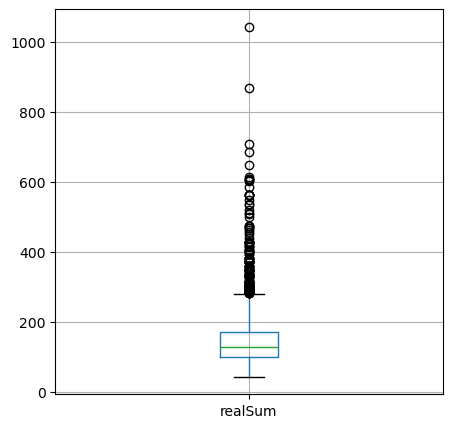

In [6]:
#Побудємо корбачасту діаграму realSum для кращого аналізу нетипових даних:
airbnb[['realSum']].boxplot(figsize=(5, 5));

Як бачимо, серед винятків, присутні два, які більші за 800. Спробуємо "витягнути" їх із датасету та проаналізувати, чому вони настільки дорогі. 

In [7]:
# Фільтрація рядків за умовою realSum > 800
filtered_airbnb = airbnb[airbnb['realSum'] > 800]

# Виведення результатів
filtered_airbnb.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
1401,869.167858,Entire home/apt,False,False,6,False,0,1,100.0,100.0,4,0.423140,0.401844,12.494689,7.831677,23.731,37.974
1611,1043.282638,Entire home/apt,False,False,6,True,1,1,100.0,100.0,3,0.629669,0.459328,17.050121,8.483717,23.729,37.973


Отже, ми бачимо що загальна оцінка чистоти та загальна оцінка клієнтів - максимальна. Вони можуть вміщати 6 людей (тобто максимальну кількість у цьому датасеті). Мають низьку відстань до метро та центру. Робимо висновок, що ці спостереження не є винятком, адже усі показники свідчать про елітність цих помешкань, а отже і ціна буде відповідна. 

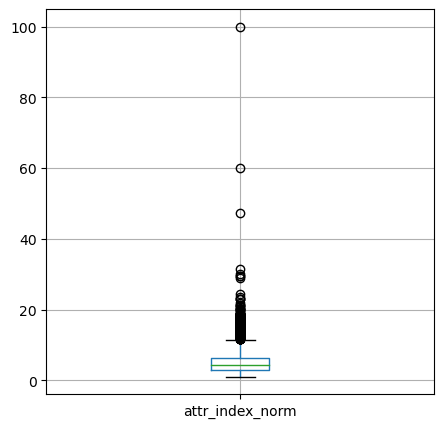

In [8]:
#Побудємо корбачасту діаграму attr_index_norm для кращого аналізу нетипових даних:
airbnb[['attr_index_norm']].boxplot(figsize=(5, 5)); 

Бачимо, що дуже нетиповими є 3 показники, які більші за 40. Спробуємо "витягнути" їх для кращого аналізу:

In [9]:
# Фільтрація рядків за умовою attr_index_norm > 40
filtered_airbnb = airbnb[airbnb['attr_index_norm'] > 40]

# Виведення результатів
filtered_airbnb.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
1204,159.117006,Entire home/apt,False,False,3,False,0,1,75.886755,95.242303,1,1.015659,0.454774,59.906966,7.254845,23.72822,37.96839
1248,269.959928,Entire home/apt,False,False,6,True,0,1,77.049399,100.358665,2,0.981997,0.481784,100.000000,9.565828,23.72860,37.96854
1274,475.241956,Entire home/apt,False,False,6,False,0,0,79.128629,97.139388,2,0.960746,0.500739,47.293395,8.519394,23.72880,37.96866


Бачимо, що спостереження 1248, не тільки має attr_index_norm на рівні 100, а і guest_satisfaction_overall більшим за 100. Отже це є хибним спостереженням, тому його потрібно видалити. На рахунок іших спостережень, бачимо, що вони теж є дивними, тому видалимо їх. 

In [10]:
# Видалення рядків де значення attr_index_norm є більшим за 80
airbnb = airbnb[(airbnb['attr_index_norm'] <= 40)]

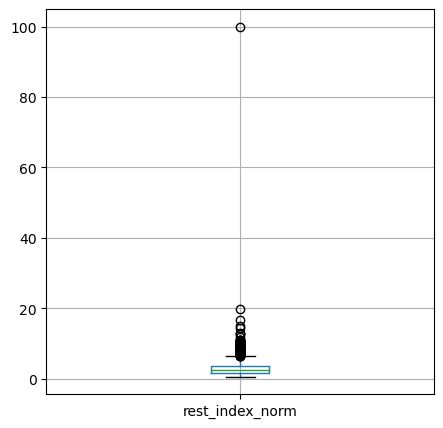

In [11]:
#Побудємо корбачасту діаграму rest_index_norm для кращого аналізу нетипових даних:
airbnb[['rest_index_norm']].boxplot(figsize=(5, 5)); 

Як бачимо, є дуже дивне нетипове значення, тому видалимо його:

In [12]:
# Видалення рядків де значення rest_index_norm є більшим за 80
airbnb = airbnb[(airbnb['rest_index_norm'] <= 80)]

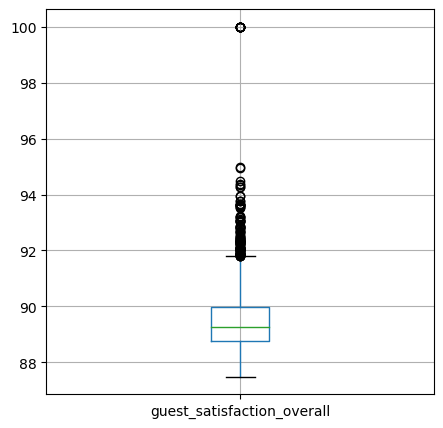

In [13]:
#Побудємо корбачасту діаграму guest_satisfaction_overall для кращого аналізу нетипових даних:
airbnb[['guest_satisfaction_overall']].boxplot(figsize=(5, 5)); 

Нетиповими є дані які більші за 96. Проаналізуємо їх детальніше:

In [14]:
# Фільтрація рядків за умовою guest_satisfaction_overall > 96
filtered_airbnb = airbnb[airbnb['guest_satisfaction_overall'] > 96]

# Виведення результатів
filtered_airbnb.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
342,603.191714,Entire home/apt,False,False,6,False,0,1,100.0,100.0,2,0.160856,0.135015,10.052204,7.086258,23.73394,37.97468
836,608.581539,Entire home/apt,False,False,6,True,0,1,100.0,100.0,3,0.453407,0.432911,13.011792,7.721147,23.73062,37.97401
1018,605.066436,Entire home/apt,False,False,5,False,0,1,100.0,100.0,2,0.891202,0.364470,8.593635,6.858977,23.72643,37.97932
1351,614.205704,Entire home/apt,False,False,4,True,0,1,100.0,100.0,2,0.869216,0.582189,18.773659,7.383718,23.73000,37.96900
1355,707.004429,Entire home/apt,False,False,6,False,0,1,100.0,100.0,2,0.778499,0.679859,16.909890,6.508564,23.73000,37.97000


Як бачимо усі спостереження є реальними, про що свідчить, банально, ціна за прожиття, яка є дуже високою.

In [15]:
# У результаті отримуємо наступний датасет: 
airbnb.describe ()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
count,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000,2623.000000
mean,147.374533,3.688525,0.261533,0.382005,75.946731,89.535379,1.263820,1.823233,0.480637,5.551889,3.188219,23.731831,37.981170
std,79.567812,1.283071,0.439553,0.485970,2.481051,1.264410,0.646364,0.956656,0.286601,3.901919,2.205962,0.013471,0.013816
min,42.884259,2.000000,0.000000,0.000000,73.216226,87.492141,0.000000,0.113560,0.020224,1.040228,0.592757,23.702710,37.953000
25%,98.657231,3.000000,0.000000,0.000000,74.963613,88.770610,1.000000,1.138928,0.286208,3.037106,1.716200,23.723115,37.969425
50%,127.715417,4.000000,0.000000,0.000000,75.643358,89.266016,1.000000,1.670282,0.418414,4.446166,2.574539,23.729820,37.979520
75%,171.419867,4.000000,1.000000,1.000000,76.369654,89.979124,2.000000,2.315298,0.599956,6.440667,3.650336,23.739520,37.989975
max,1043.282638,6.000000,1.000000,1.000000,100.000000,100.000000,4.000000,6.222396,1.959657,31.335229,19.899212,23.786020,38.031140


Було видалено 4 значення, attr_index_norm та rest_index_norm більше не мають значень, які рівні 100. guest_satisfaction_overall не має значень більших за 100.

### 4. Детальний розвідковий та візуальний аналіз даних

Для кращого розуміння даних зробимо наступні кроки:

1. Знайдемо кореляції між стовпчиками та побудуємо теплову карту кореляцій
2. Зробимо розподіл кількох стовпчиків
3. Зробимо групування
4. Проаналізуємо вплив факторів на realSum за допомогою візуалізації 

Найбільше нас цікавить показник realSum, андже нам необхідно надати власникам помешкань, що пропонують послуги оренди на Airbnb, інформацію про те, які фактори впливають на формування ціни на оренду помешкання(realSum) та як можна покращити характеристики житла, що пропонується для оренди, з метою збільшення його популярності у клієнтів Airbnb. Також в подальшому він стане залежною змінною у побудові лійнійної регресії. Тому сконцентруємось на аналізі взаємодії саме цього показника з іншими.

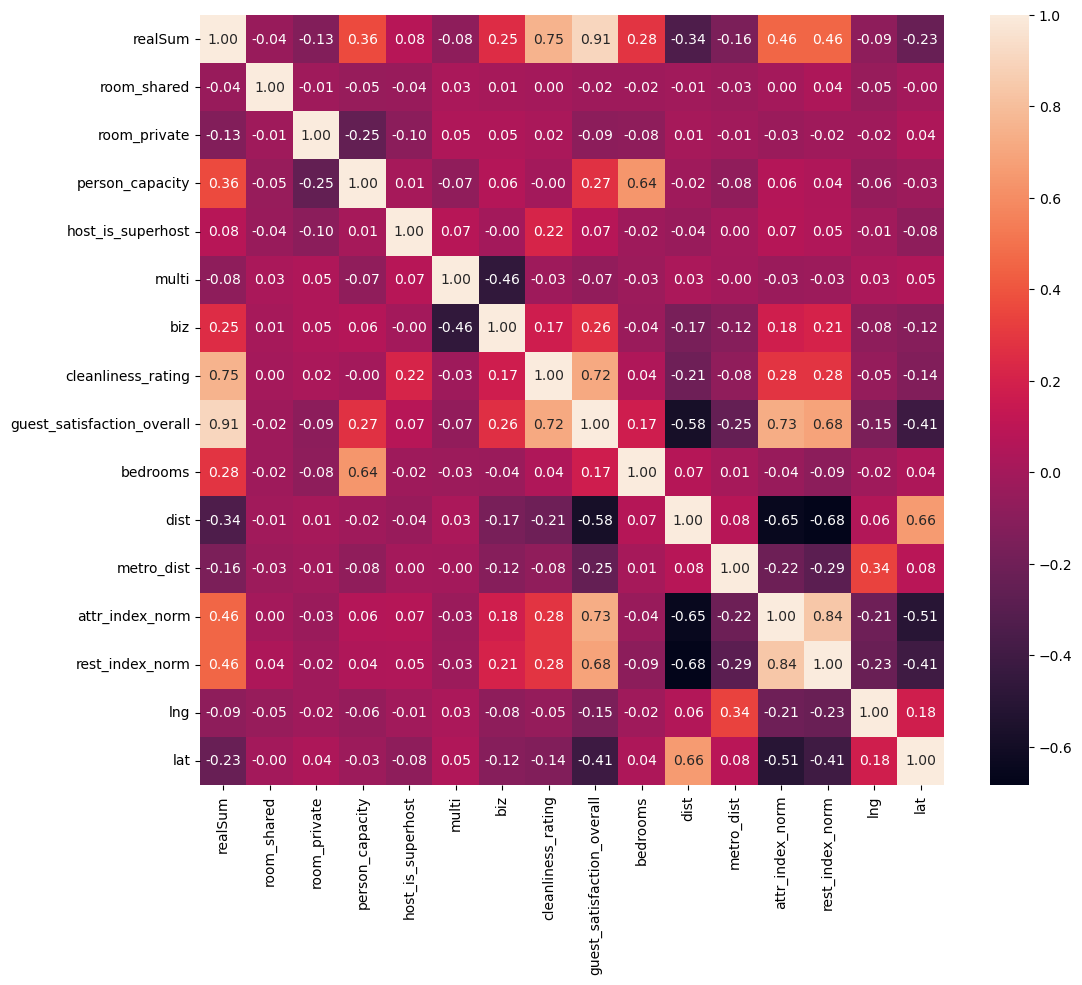

In [16]:
# Побудуємо кориляційну матрицю аби побачити лійнійні залежності між показниками.

# Створення кореляційної матриці
corr_matrix = airbnb.corr()

# Відображення кореляційної матриці
plt.figure(figsize=(12, 10 ))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Як бачимо найбільша позитивна лінійна зележність є між показниками realSum та guest_satisfaction_overall та становить 0,91. Найбільша негативна лінійна залежність між показниками rest_index_norm та dist та становить -0,68. В загальному бачимо, що присутня досить велика кількість лінійних залежностей між майбутніми незалежними змінними. Це може сприяти винекнення мультиколінеарності. 

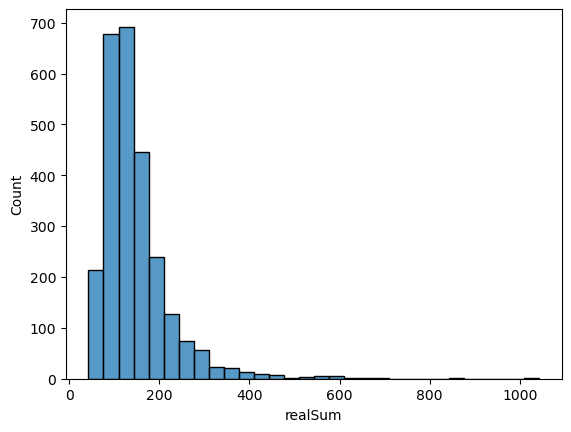

In [17]:
# Зробимо розподіл кількох стовпчиків:
# Розподіл показника realSum за допомогою histplot
sns.histplot(airbnb['realSum'], bins=30)
plt.show()

Аналізуючи, бачимо, що найбільша кількість помешкань, за дві ночі для двох людей, коштує від 100 до 150 євро. Однак присутні варіанти і значно дорожчі, хоча їхня кількість значно менша. Робимо висновок що найбільшою популярністю користуються саме помешкання від 100 до 150 євро.

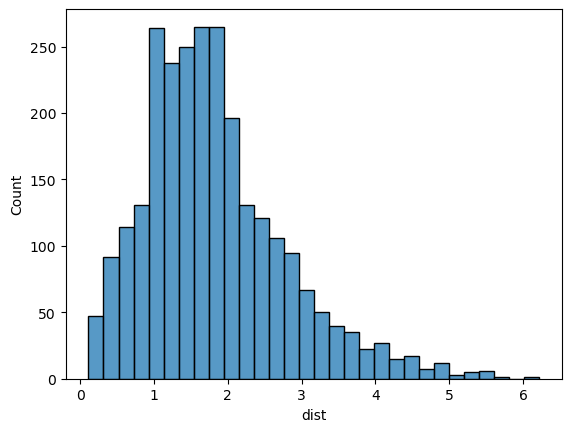

In [18]:
# Розподіл показника dist за допомогою histplot
sns.histplot(airbnb['dist'], bins=30)
plt.show()

Розподіл свідчить, що переважна кількість помешкань знаходиться на відстані від 1 до 2 кілометрів від центру міста. Після 2 кілометрів їхня кількість поступово зменшуюється аж до 6 км. Робимо висновок, що місто має розмір близько 12 км.

In [19]:
# Згрупуємо помешкання за типом орендованого приміщення за допомогою groupby:
airbnb.groupby('room_type')[['realSum', 'guest_satisfaction_overall', 'dist', 'person_capacity', 'attr_index_norm']].mean()

,realSum,guest_satisfaction_overall,dist,person_capacity,attr_index_norm
room_type,,,,,
Entire home/apt,150.455226,89.568703,1.821597,3.784387,5.589972
Private room,111.373774,89.140896,1.850416,2.545918,5.074503
Shared room,80.339637,88.975588,1.595527,2.333333,5.780243


Отже, можемо стверджувати що в залежності від типу приміщення, сума оренди буде збільшуватись, в середньому, від 80 до 150 євро (спільна кімната - окрема кімната - цілий будинок/квартира). Задоволеність теж буде збільшуватись, як і кількість людей що можна розмістити. Однак індекс розміщеня, буде кращим для спільних кімнат, ніж для цілого будинку чи кімнати. Тому робимо висновок, що у випадку коли хочеться мати краще розміщення орендованого помешкання - краще обирати спільну кімнату. 

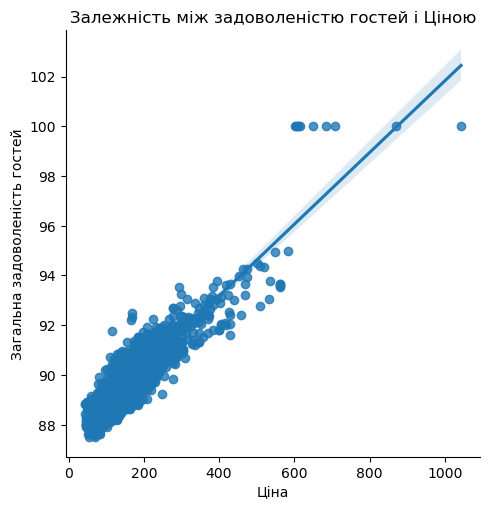

In [20]:
# Проаналізуємо вплив факторів на realSum за допомогою візуалізації 
# Спробуємо візуалізувати залежність між realSum та guest_satisfaction_overall за допомогою lmplot
sns.lmplot(x='realSum', y='guest_satisfaction_overall', data=airbnb)
plt.xlabel('Ціна')
plt.ylabel('Загальна задоволеність гостей')
plt.title('Залежність між задоволеністю гостей і Ціною')
plt.show()

Аналізуючи, бачимо, що присутня досить чітка залежність між ціною та задоволеністю. Тому можна стверджувати, що рівень задоволеності досить важливий у випадку, якщо ми хочемо підняти ціну за оренду

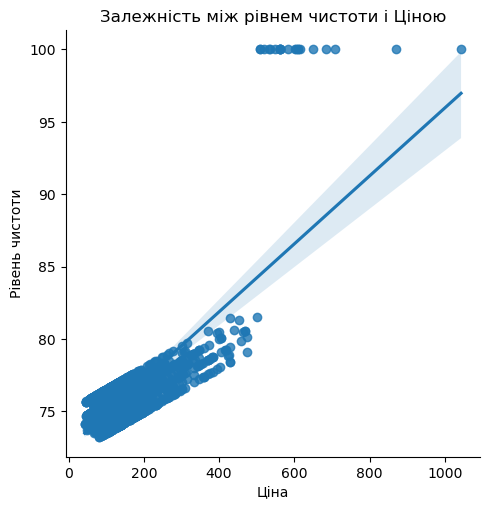

In [21]:
# Спробуємо візуалізувати залежність між realSum та cleanliness_rating за допомогою lmplot
sns.lmplot(x='realSum', y='cleanliness_rating', data=airbnb)
plt.xlabel('Ціна')
plt.ylabel('Рівень чистоти')
plt.title('Залежність між рівнем чистоти і Ціною')
plt.show()

Як і у минулому випадку, є чітка залежність між чистотою та ціною. Тому для підняття ціни, необхідно сприяти збільшення рівня чистоти.

Text(0.5, 1.0, 'Залежність між ціною, кількістю можливих гостей та  наявністю позначки superhost ')

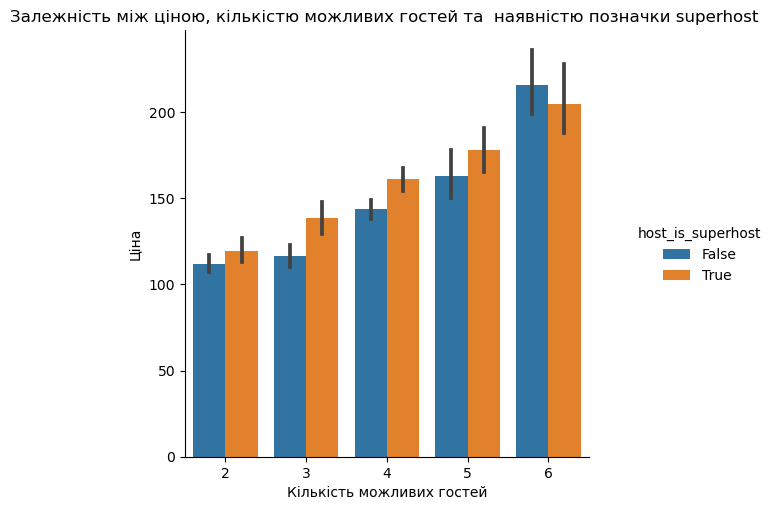

In [22]:
# Спробуємо візуалізувати залежність між realSum, person_capacity, та host_is_superhost за допомогою catplot
sns.catplot(data=airbnb, x='person_capacity', y='realSum', hue='host_is_superhost', kind='bar')
plt.xlabel('Кількість можливих гостей')
plt.ylabel('Ціна')
plt.title("Залежність між ціною, кількістю можливих гостей та  наявністю позначки superhost ")

Спостерігаємо, що в залежності від кількості гостей, ціна на оренду збільшується. Наявність позначки, хоч і не дуже значимо, однак все-таки збільшує ціну на оренду.

Text(0.5, 1.0, 'Залежність між ціною та відстанню до центра')

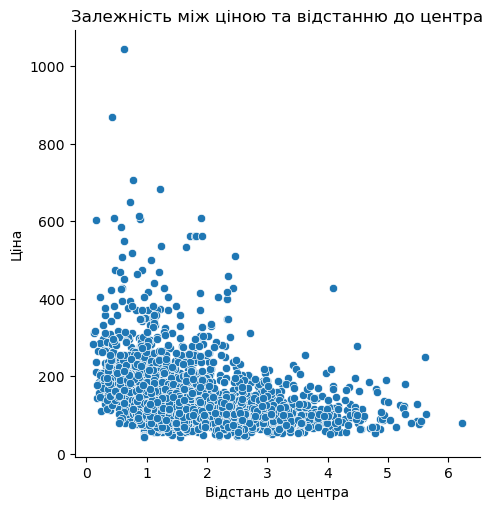

In [23]:
# Проаналізуємо залежність між ціною оренди та відстанню до центра за допомогою relplot
sns.relplot(data = airbnb, x='dist', y='realSum', kind='scatter');
plt.xlabel('Відстань до центра')
plt.ylabel('Ціна')
plt.title("Залежність між ціною та відстанню до центра")

Дійсно, відстань до центра суттєво впливає на ціну оренди. Чим ближче приміщення до центра, тим краща ціна для власника.

Text(0.5, 1.0, 'Залежність між ціною та першою координатою')

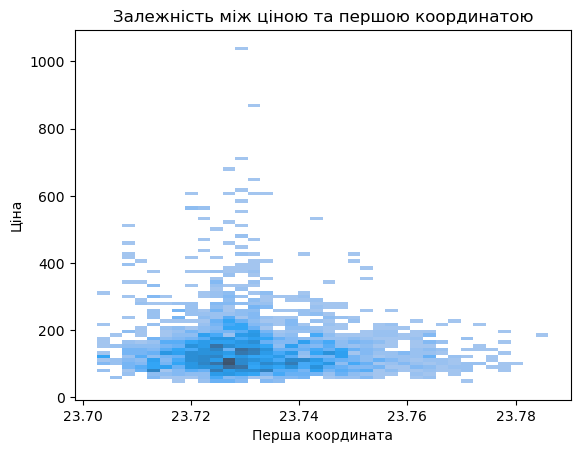

In [24]:
# Проаналізуємо залежність між ціною оренди та координатами приміщення за допомогою histplot:
sns.histplot(x='lng', y='realSum', data=airbnb)
plt.xlabel('Перша координата')
plt.ylabel('Ціна')
plt.title("Залежність між ціною та першою координатою")

Як бачимо, якщо приміщення знаходться  між координатою 23.72 та 23.74, ціна буде значно вище. Тому робимо висновок, що за першою координатою центр знаходиться на координаті 23.73.

Text(0.5, 1.0, 'Залежність між ціною та другою координатою')

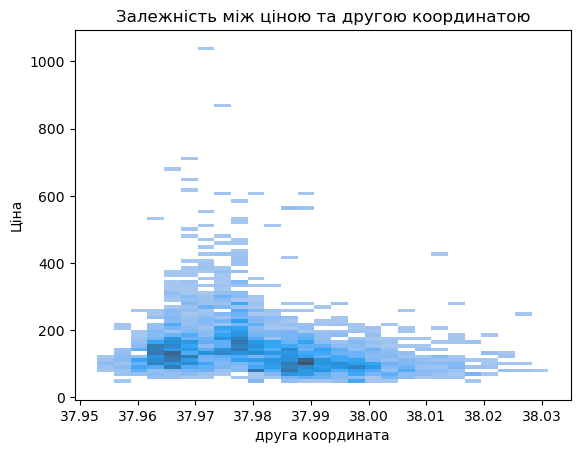

In [25]:
sns.histplot(x='lat', y='realSum', data=airbnb)
plt.xlabel('друга координата')
plt.ylabel('Ціна')
plt.title("Залежність між ціною та другою координатою")

За другою координатою центр уже знаходиться на координаті 37.97. Підсумовуючи, координати центра - 23° 73' сх. дов., 37° 97' пн. шр.. І чим ближче приміщення до нього - тим краще

Text(0.5, 1.0, 'Залежність між ціною, кілька кімнат для оренди та орендою для бізнес зустрічей')

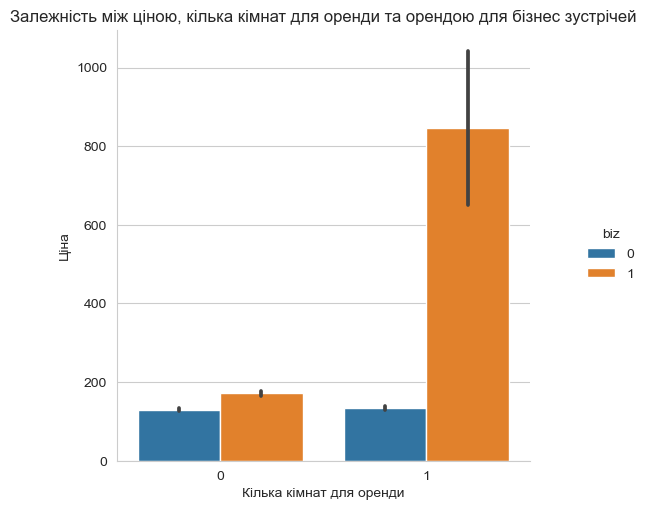

In [26]:
# Спробуємо візуалізувати залежність між realSum, multi, та biz за допомогою catplot
sns.set_style('whitegrid')
sns.catplot(data=airbnb, x='multi', y='realSum', hue='biz', kind='bar')
plt.xlabel('Кілька кімнат для оренди')
plt.ylabel('Ціна')
plt.title("Залежність між ціною, кілька кімнат для оренди та орендою для бізнес зустрічей")

Отже можна стверджувати, що у випадку коли кімнати не можна орендувати для бізнес зустрічей, наявність такого фактору як кілька кімнат для оренди в одному приміщенні. Не грає ніякої ролі в ціні на оренду. Майже аналогічно, якщо немає кількох кімнат для оренди, наявність такого фактору як оренда кімнат для бізнес зустрічей - не грає ніякої ролі для ціни. Іншими словами лише при наявності обох факторів це буде впливати на ціну оренди, і впливатиме дуже сильно.

Text(0.5, 1.0, 'Залежність між ціною, и ділите кімнату з іншим та чи є кімната повністю у вашому розпорядженні')

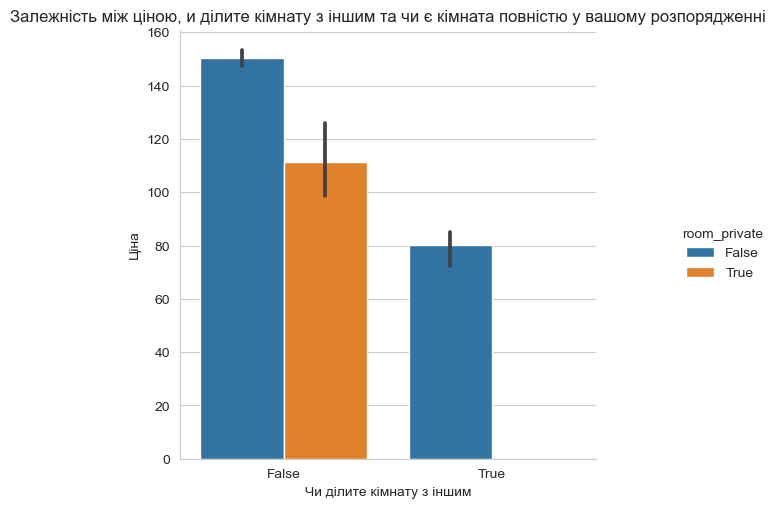

In [27]:
# Спробуємо візуалізувати залежність між room_shared, realSum, та room_private за допомогою catplot
sns.catplot(data=airbnb, x='room_shared', y='realSum', hue='room_private', kind='bar')
plt.xlabel('Чи ділите кімнату з іншим')
plt.ylabel('Ціна')
plt.title("Залежність між ціною, и ділите кімнату з іншим та чи є кімната повністю у вашому розпорядженні")

Отже, очивидно, що при значенні room_shared = True, ніяких спостережень з room_private True не буде. В загальному можна стверджувати, що у випадку коли не потрібно ділитись кімнатою, то ціна за оренду збільшується. Що цікаво, найявність такого фактора як "кімната повністю у вашому розпорядженні на час оренди" зменшує ціну за оренду. 

Text(0.5, 1.0, 'Залежність між ціною та рейтингом розташування')

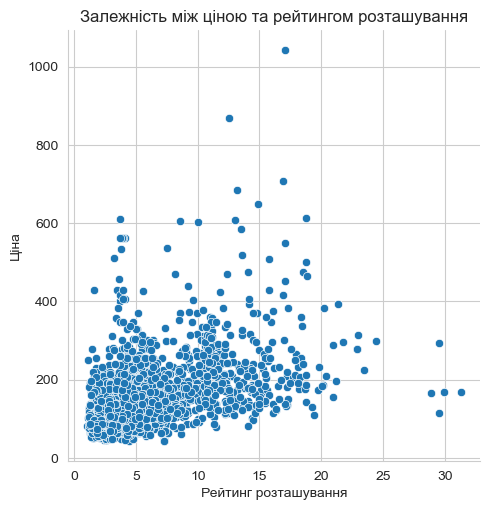

In [28]:
# Проаналізуємо залежність між ціною оренди та відстанню до центра за допомогою relplot
sns.relplot(data = airbnb, x='attr_index_norm', y='realSum', kind='scatter');
plt.xlabel('Рейтинг розташування')
plt.ylabel('Ціна')
plt.title("Залежність між ціною та рейтингом розташування")

Графік розподілу дозволяє стверджувати, що рейтинг розташування хоч і не сильно, проте дозволяє збільшити ціну за оренду. Присутня певна залежність, за якою, чим краще роззташування - тим більша ціна за житло.

Підсумовуючи аналіз, ми можемо стверджувати що на формування ціни за житло вливає велика кількість чинників. Серед представлених показників, усі так, чи інакше впливають на ціну. Однак деякі показники більше, а деякі менше.
1. Розташування помешкання досить позитивно впливає на ціну - чим ближче до координат центра (23° 73' сх. дов., 37° 97' пн. шр.) та до метро - тим краще.
2. Чим більший рейтинг місцерозташування та кількості ресторанів у районі, тим більше грошей клієнти будуть платити за оренду. 
3. Наявність більшої кількості кімнат приваблює клієнтів та дозволяє підняти ціну за житло. 


Проаналізуємо показники, на які можуть впливати орендодавці:
1. В першу чергу, для того аби підняти ціну за оренду, потрібно підняти рівень чистоти. Це один із найважливіших показників, який впливає і на задоволеність клієнтів. 
2. Якщо є можливість, потрібно збільшити максимальну кількість гостей, що може проживати у приміщенні, однак при цьому не можна нехтувати іншими зручностями.
3. Хоч не дуже сильно, однак позитивно впливає наявність відзнаки супергосподаря на Airbnb. Це дозволить підняти ціну на +-5 євро. 
4. У випадку, якщо господар здає в оренду кілька кімнат в одному приміщенні, варто реалізувати можливість оренди для бізнес зустрічей. Це дозволить підняти оренду в кілька раз, для таких ситуацій.
5. Якщо є можливість зробити приміщення персональним, то ціну можна збільшити. При цьому повністю надавати приватність не варто, адже це ніякиим чином не впливає на ціну. 
6. І на прикінці хотілось би відзначити, що найбільше на ціну впливає показник задоволеності клієнтів. Завдяки ньому можна значно сильно збільшити ціну за оренду. Проте цей показник є результатом багатьох факторів, включаючи вищеперераховані, і для того аби збільшити його значення потрібно прикласти значну кількість зусиль.

### 5.  Реалізація обраного методу машинного навчання

In [29]:
# Для початку перекодуємо категоріальну змінну room_type
airbnb = pd.get_dummies(airbnb, columns = ["room_type"], drop_first=True)
                        
# Перекодуємо Булеві змінні room_shared, room_private, host_is_superhost замінивши False на 0, True на 1.
airbnb['room_shared'] = airbnb['room_shared'].replace({False: 0, True: 1})
airbnb['room_private'] = airbnb['room_private'].replace({False: 0, True: 1})
airbnb['host_is_superhost'] = airbnb['host_is_superhost'].replace({False: 0, True: 1})     

In [30]:
#Сформуємо матрицю незалежних змінних та вектор залежної змінної
X = airbnb.drop('realSum', axis=1)
y = airbnb.realSum

In [31]:
#Перетворимо X та Y на масиви numpy.
X_np = np.array(X)
print(X_np.shape)

y_np = np.array(y).reshape(-1,1)
print(y_np.shape)

(2623, 17)

(2623, 1)


In [32]:
#Розділимо дані на тренувальну та тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size = 0.3, random_state=111)

In [33]:
#Побудуємо лінійну регресію
from sklearn.linear_model import LinearRegression
# Метод оцінювання регресії
linear_reg = LinearRegression()

#Оцінювання регресії на тренувальній вибірці
linear_reg.fit(X_train,y_train)

LinearRegression()

In [34]:
#Оцінимо якість моделі на тренувальній та тестовій вибірках за допомогою R^2 та RMSE
# імпортуємо необхідні метрики з бібліотеки sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# прогноз залежної змінної на тренувальній та тестовій вибірках
y_pred_train = linear_reg.predict(X_train)
y_pred = linear_reg.predict(X_test)

# розраховуємо R^2 на тренувальній та тестовій вибірках
print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_pred)))

# розраховуємо RMSE на тренувальній та тестовій вибірках
rmse_train = MSE(y_train,y_pred_train, squared=False)
rmse_test = MSE(y_test,y_pred, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

R^2 train: 0.943

R^2 test: 0.914

Root Mean Squared Error train: 19.303

Root Mean Squared Error test: 22.269


Аналізуючи R^2 можемо стверджувати, що лінійна регресія приблизно на 91-94% пояснює, якою буде ціна за оренду, що є досить хорошим результатом. RMSE використовується в подальшому для порівняння моделей.

Спробуємо застосувати регуляризацію лінійної регресії для покращення моделі. Для цього спочатку використаємо ElasticNet з довільними значеннями alpha та l1_ratio (0,5 обидві)

In [35]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha= 0.5, l1_ratio=0.5)
en.fit(X_train, y_train)

y_pred_train = en.predict(X_train)
y_test_pred = en.predict(X_test)


print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_test_pred)))

rmse_train = MSE(y_train, y_pred_train, squared=False)
rmse_test = MSE(y_test, y_test_pred, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

R^2 train: 0.885

R^2 test: 0.880

Root Mean Squared Error train: 27.449

Root Mean Squared Error test: 26.377


Як бачимо регресія ElasticNet значно гірше моделює ніж проста регресія та пояснює лише 88% рівня ціни за житло. Однак  різниця між R^2 test та R^2 train зменшилась, що свідчить про спрощення моделі.

Застосуємо GridSearchCV для визначення кращих параметрів регуляризації:

In [36]:
from sklearn.model_selection import GridSearchCV

#метод оцінювання моделі (у даному випадку ElasticNet)
el_net = ElasticNet()

#задаємо можливі комбінації значень параметрів а та l1_ratio
en_grid = {'alpha': np.linspace(0,1,50),
          'l1_ratio': np.linspace(0,1,50)}

grid = GridSearchCV(estimator=el_net,
                      param_grid=en_grid,
                      scoring='neg_mean_squared_error',
                       cv=5, # крос-валідація буде проведена 5 разів
                       n_jobs=-1) 

Оцінемо кращу модель (на основі GridSearch)

In [37]:
grid_result = grid.fit(X_train, y_train)

model_best = grid_result.best_estimator_
print(model_best)

y_pred_best_train = model_best.predict(X_train)
y_pred_best = model_best.predict(X_test)


print('R^2 train: {:.3f}'.format(r2_score(y_train, y_pred_best_train)))
print('R^2 test: {:.3f}'.format(r2_score(y_test, y_pred_best)))

rmse_train = MSE(y_train,y_pred_best_train, squared=False)
rmse_test = MSE(y_test,y_pred_best, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

ElasticNet(alpha=0.08163265306122448, l1_ratio=0.8979591836734693)

R^2 train: 0.942

R^2 test: 0.915

Root Mean Squared Error train: 19.449

Root Mean Squared Error test: 22.188


У порівння показники простої моделі:

1. R^2 train: 0.943
2. R^2 test: 0.914
3. Root Mean Squared Error train: 19.303
4. Root Mean Squared Error test: 22.269

Як бачимо, l1_ratio=0.897, це свідчить що Рідж-регресія була майже повністю упущена. Бачимо, що R^2 test збільшився на 0,1%, а RMSE test зменшився на 0,08. Однак RMSE train збільшився на 0,146, а R^2 train зменшився на 0,1%. В загальному можемо стверджувати що модель стала трохи гірше, тому покращення не потрібне. Для прогнозування будемо використовувати просту лінійну регресію

### 6. Прогнозування:

In [38]:
# завантаження даних про орендодавців
new_airbnb = pd.read_csv('airbnb_new.csv')

# Так як Unnamed: 0 є непотрібним, видалимо його:
new_airbnb.drop(["Unnamed: 0"], axis=1, inplace=True)

# Для початку перекодуємо категоріальну змінну room_type
new_airbnb = pd.get_dummies(new_airbnb, columns = ["room_type"], drop_first=True)
                        
# Перекодуємо Булеві змінні room_shared, room_private, host_is_superhost замінивши False на 0, True на 1.
new_airbnb['room_shared'] = new_airbnb['room_shared'].replace({False: 0, True: 1})
new_airbnb['room_private'] = new_airbnb['room_private'].replace({False: 0, True: 1})
new_airbnb['host_is_superhost'] = new_airbnb['host_is_superhost'].replace({False: 0, True: 1})    

# Добавимо пропущений стовпчик
new_airbnb = new_airbnb.assign(room_type_Shared_room = 0) 


In [39]:
# виклик методу .predict() для прогнозування розміру ціни за оренду
predicted = linear_reg.predict(new_airbnb)

# Додамо новий стовпець до таблиці
new_airbnb["predicted"] = predicted

In [40]:
# Спрогнозована ціна за житло для нових орендодавців:
new_airbnb.head(22)

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,room_type_Private room,room_type_Shared_room,predicted
0,0,0,6,0,1,0,74.956202,89.766771,3,1.960907,0.384833,3.036007,1.677708,23.75447,37.98472,0,0,192.394659
1,0,0,6,0,0,1,75.044079,90.062078,2,1.810028,0.467566,5.349667,3.078122,23.71480,37.97526,0,0,199.547652
2,0,0,6,0,0,0,74.056335,88.704831,3,3.044515,0.977869,2.362048,1.400054,23.70961,37.99388,0,0,138.197838
3,0,0,4,1,0,1,76.871839,89.965491,1,1.792788,0.420030,5.354979,3.155222,23.71500,37.97600,0,0,185.148710
4,0,0,2,0,1,0,75.304103,89.452193,0,1.407815,0.175824,9.171014,4.403676,23.72531,37.96571,0,0,93.633676
5,0,0,3,1,0,1,75.979858,88.182546,1,4.096413,0.473972,1.574472,0.921230,23.73397,38.01244,0,0,101.328527
6,0,1,2,1,0,0,76.128348,89.263217,1,1.008045,0.367427,8.228222,7.322508,23.72499,37.97939,1,0,88.439410
7,0,0,4,0,0,1,74.880580,88.851747,2,2.042617,0.919497,2.823991,1.592780,23.74815,37.99094,0,0,128.378246
8,0,0,4,1,0,1,76.000094,89.431306,1,1.805169,0.407866,5.813041,3.167511,23.72237,37.96299,0,0,139.097077
9,0,0,4,0,0,1,74.251377,88.766538,1,2.113968,0.170590,4.062572,2.786671,23.71200,37.98000,0,0,95.555419


Отже, ми застосували створену нами модель для пронозування ціни за житло для нових орендодавців. Бачимо що найбільшу ціну матиме 16-те приміщення (215.23), а найменше 20-й (70.91). Що характерно, найдорожче житло має найбільший рівень задоволення клієнтів на рівні 91.37.

### 7. Висновок

В даній роботі ми провели аналіз даних щодо оренди помешкань на Airbnb в Афінах з метою кращого розуміння факторів, що впливають на ціни оренди, та надання рекомендацій власникам житла для покращення його популярності та встановлення оптимальної ціни оренди.

Під час аналізу ми врахували різні фактори, такі як тип кімнати, кількість можливих гостей, рівень задоволеності клієнтами, місцезнаходження та інші, та дослідили їх вплив на ціни оренди помешкань. За допомогою алгоритму машинного навчання (лінійна регресія) ми побудували модель, яка здатна прогнозувати ціни оренди на основі цих факторів.

За результатами дослідження ми отримали наступні висновки:

- Усі представлені фактори мають вплив на ціну оренди помешкань на Airbnb в Афінах. Деякі фактори, наприклад, задоволеність клієнтами або чистота, можуть мати більший вплив на ціни, ніж інші.

- Рекомендації для власників помешкань на Airbnb включають покращення рівня чистоти, збільшення кількості можливих гостей, наявність відзнаки супергосподаря, надання персональної кімнати(будинку) гостям, та, особливо, досягнення високого рівня задоволення клієнтів.

- Для нових власників житла на Airbnb я рекомендую використовувати модель на основі лінійної регресії для прогнозування оптимальної ціни оренди. Це дозволить їм встановити конкурентоспроможну ціну, яка відображатиме реальну ринкову вартість їх помешкання і забезпечить йому високу відвідуваність та популярність серед потенційних клієнтів.